# Customer Satisfaction in Airline

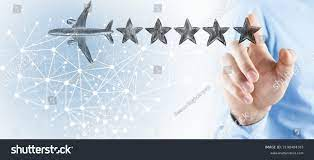

## Introduction

***In this notebook, I will complete an effective binomial logistic regression.***

***I am interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. I would like to construct and evaluate a model that predicts whether a future customer would be satisfied with airline's services given previous customer feedback about their flight experience.***

***The data for this notebook is for a sample size of 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. My goal will be to utilize a binomial logistic regression model to help the airline model and better understand this data.***

***I will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.***

# Loading Required Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Scikit Learn

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.metrics import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder   ### onrhot convert 0&1
from sklearn.compose import ColumnTransformer#### col tranform
from sklearn.feature_selection import SelectFromModel
import joblib
import datetime 

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

from sklearn.linear_model import LogisticRegression

from collections import Counter
from sklearn import model_selection, naive_bayes, svm, metrics, feature_extraction


## Statsmodel
import statsmodels.api as sm

#ensembling
from mlxtend.classifier import StackingCVClassifier

import gradio as gr

# Loading the Dataset

In [2]:
df= pd.read_csv(r"C:\Users\Nikhil Nandugade\Downloads\Invistico_Airline.csv\Invistico_Airline.csv")

In [3]:
df

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0


In [4]:
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [5]:
df.tail()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
129875,satisfied,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0
129879,dissatisfied,disloyal Customer,38,Personal Travel,Eco,4307,3,4,3,3,...,3,4,5,5,5,3,3,3,185,186.0


In [6]:
df.size

2857360

In [7]:
df.shape

(129880, 22)

In [8]:
pd.DataFrame(list(df))

,0
0,satisfaction
1,Customer Type
2,Age
3,Type of Travel
4,Class
5,Flight Distance
6,Seat comfort
7,Departure/Arrival time convenient
8,Food and drink
9,Gate location


## Domain Analysis

***Satisfaction:  Passenger satisfaction level.***

***Customer Type:  Type of customer.***

***Age:  Age of the passenger.***

***Type of Travel:  Purpose of the trip.***

***Class:  Travel class.***

***Flight Distance:  Flight distance in miles.***

***Seat Comfort:  Passenger's rating for seat comfort.***

***Departure/Arrival Time Convenience:  Passenger's rating for the convenience of departure/arrival times.***

***Food and Drink:  Passenger's rating for food and drink quality.***

***Gate Location:  Passenger's rating for the gate location.***

***Inflight WiFi Service:  Passenger's rating for inflight WiFi service.***

***Inflight Entertainment:  Passenger's rating for inflight entertainment.***

***Online Support:  Passenger's rating for online customer support.***

***Ease of Online Booking:  Passenger's rating for the ease of online booking.***

***On-board Service:  Passenger's rating for on-board service.***

***Leg Room Service:  Passenger's rating for legroom service.***

***Baggage Handling:  Passenger's rating for baggage handling.***

***Check-in Service:  Passenger's rating for check-in service.***

***Cleanliness:  Passenger's rating for cabin cleanliness.***

***Online Boarding:  Passenger's rating for online boarding service.***

***Departure Delay in Minutes:  Delay in departure time in minutes.***

***Arrival Delay in Minutes:  Delay in arrival time in minutes.***

# Check for Information 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [10]:
df.describe()  #### Statistical parameters of Numerical columns

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [11]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 22)


# Missing value Treatment

In [12]:
df.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

<Axes: >

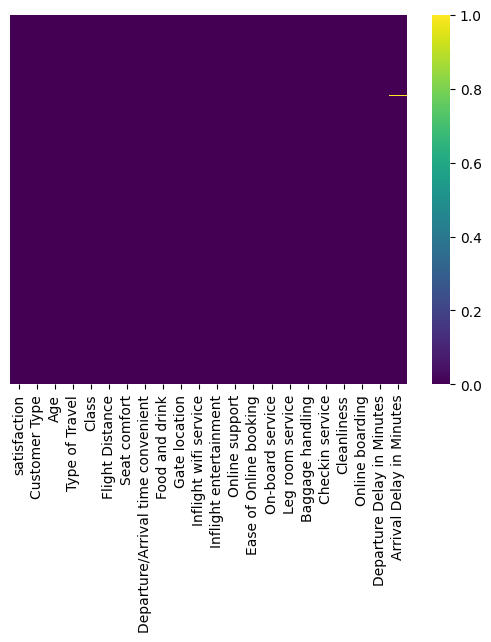

In [13]:
sns.heatmap(df.isnull(),yticklabels= False,cmap="viridis")

In [14]:
df["Arrival Delay in Minutes"].mean()

15.09112883918849

In [15]:
df["Arrival Delay in Minutes"]= df["Arrival Delay in Minutes"].fillna(15.09112883918849)

In [16]:
df.isnull().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

***Doesn't have any null values***

# Explorartory Data Analysis (EDA)

## Visualization : Pie chart of Satisfaction

In [17]:
df["satisfaction"].unique()

array(['satisfied', 'dissatisfied'], dtype=object)

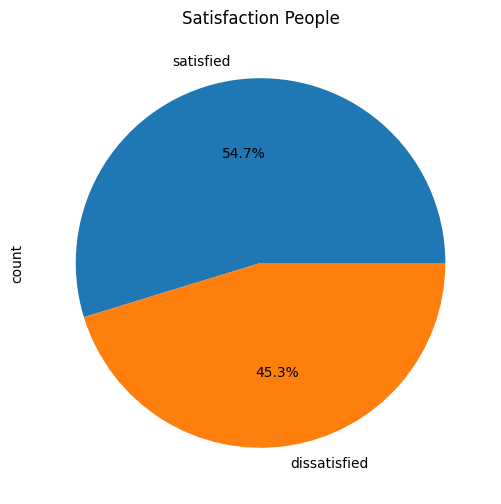

In [18]:
plt.figure(figsize=(8, 6))
df['satisfaction'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Satisfaction People")
plt.show()

## Visualization : Pie chart of Customer Type

In [19]:
df["Customer Type"].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [20]:
r=df['Customer Type'].value_counts().reset_index()
r

,Customer Type,count
0,Loyal Customer,106100
1,disloyal Customer,23780


<Axes: ylabel='count'>

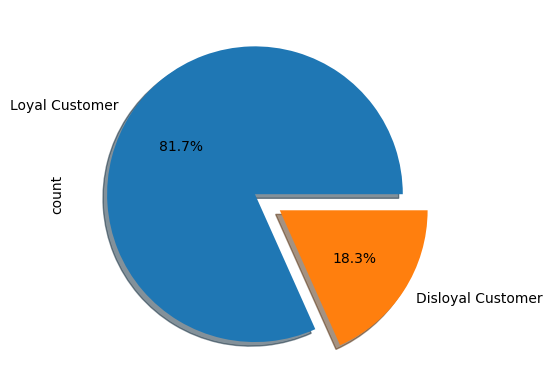

In [21]:
#Pie chart of data
df['Customer Type'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True,labels=['Loyal Customer', 'Disloyal Customer'])

## Visualization : Histogram of Age values

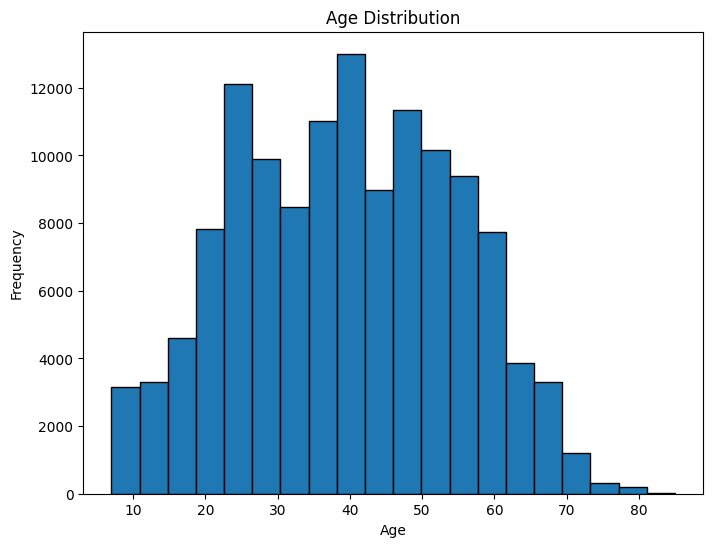

In [22]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

## Visualization : Bar plot of Travel Types

In [23]:
df["Type of Travel"].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

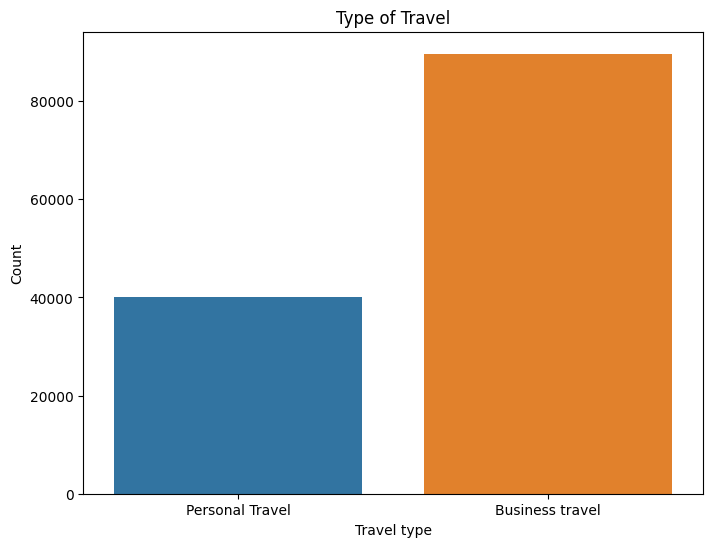

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Type of Travel')
plt.xlabel('Travel type')
plt.ylabel('Count')
plt.title('Type of Travel')
plt.show()

## Visualization : Pie chart of Class

In [25]:
df["Class"].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

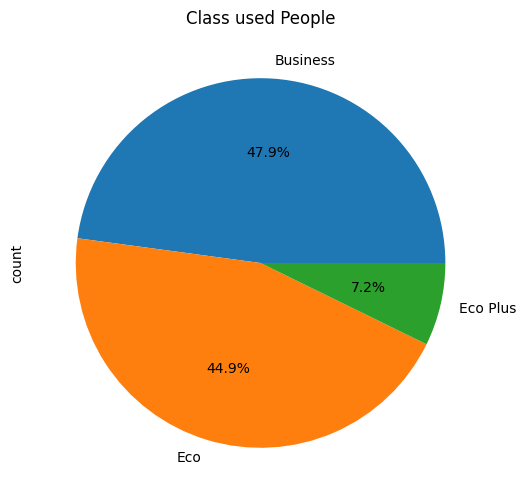

In [26]:
plt.figure(figsize=(8, 6))
df['Class'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Class used People")
plt.show()

## Visualization : Bar chart of Age on Satisfaction

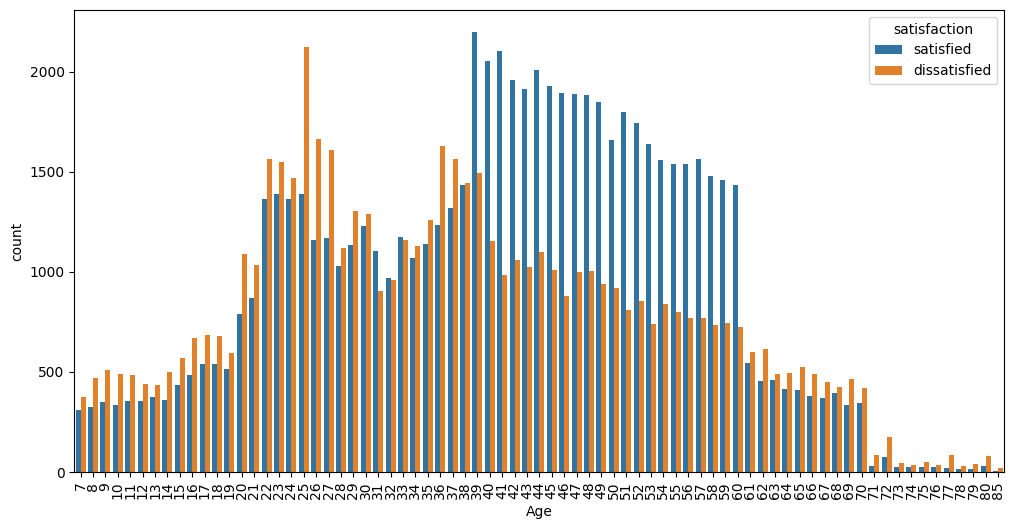

In [27]:
#Plotting histogram of age with respect to Satisfaction
plt.figure(figsize=(12, 6))
sns.countplot(x="Age", hue='satisfaction', data=df)
plt.xticks(rotation=90)  
plt.show()

## Visualization : Kde chart of Age on Class

<Axes: xlabel='Age', ylabel='Density'>

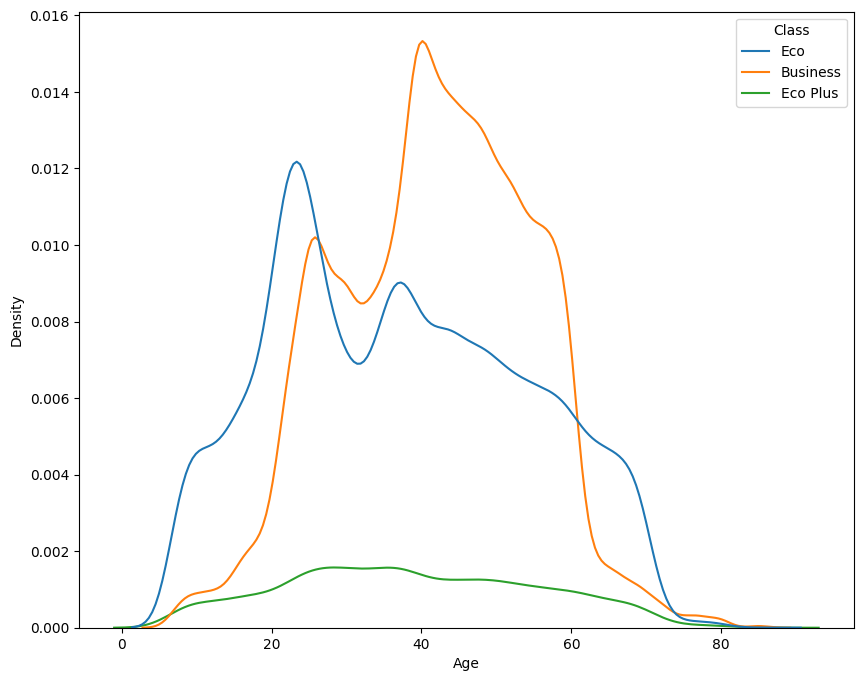

In [28]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data = df, x = 'Age', hue = 'Class', color = 'blue')

## Visualization : Kde chart of Age on Customer Type

<Axes: xlabel='Age', ylabel='Density'>

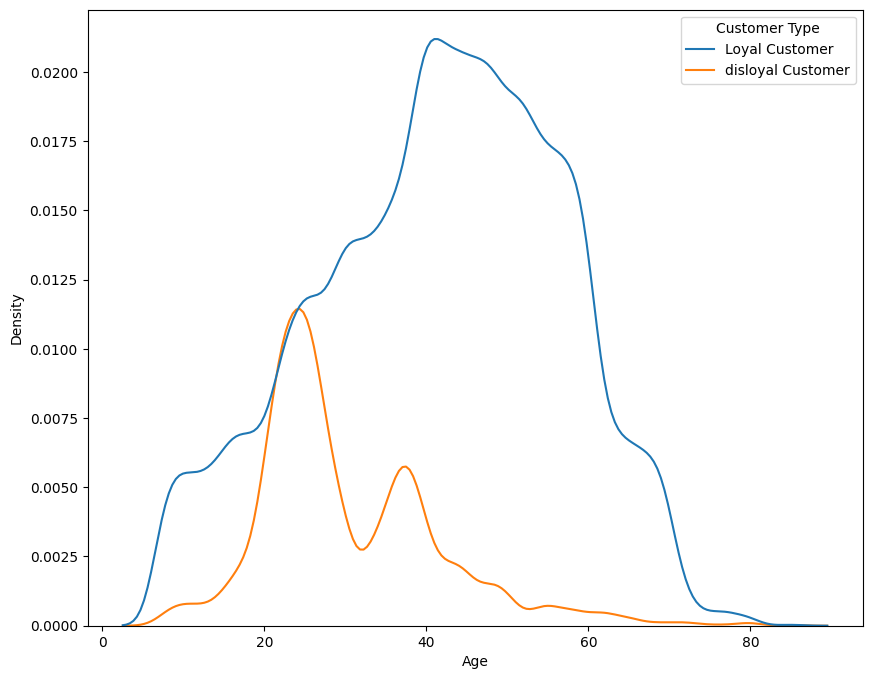

In [29]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data = df, x = 'Age', hue = 'Customer Type', color = 'blue')

## Visualization : Kde chart of Age on Satisfaction

<Axes: xlabel='Age', ylabel='Density'>

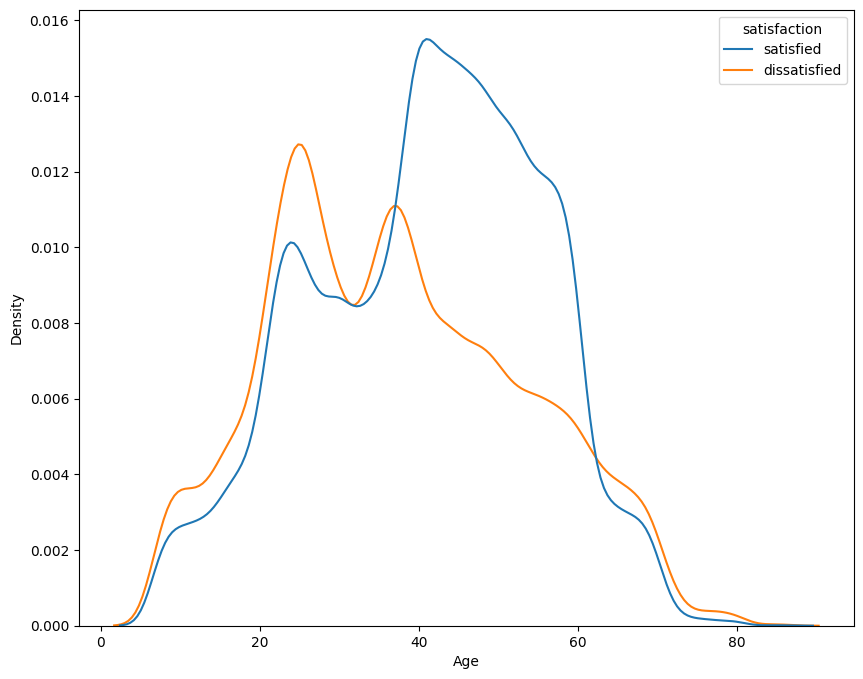

In [30]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data = df, x = 'Age', hue = 'satisfaction', color = 'blue')

## Visualization : Bar chart of Flight Distance vs Type of Travel on Satisfaction

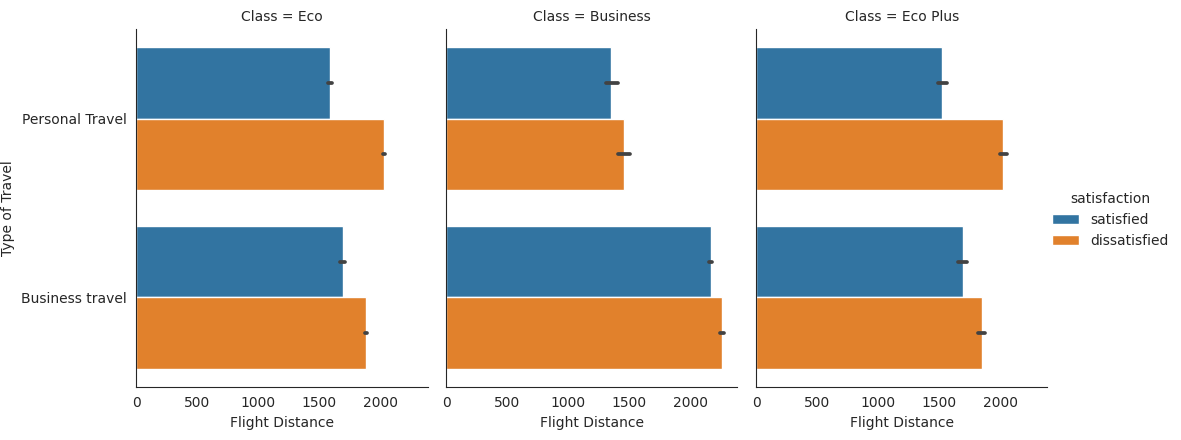

In [31]:
# Type_of_Travel and Flight_Distance by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Flight Distance", y="Type of Travel", hue="satisfaction", col="Class", data=df, kind="bar", height=4.5, aspect=.8)


# Modeling

In [32]:
categorical_cols = ["Customer Type","Type of Travel","Class"]
encoder = OneHotEncoder(drop="first",sparse= False)   ####OneHotEncoder for categorical col
encoder_cols = pd.DataFrame(encoder.fit_transform(df[categorical_cols]),columns = encoder.get_feature_names_out(categorical_cols))

In [33]:
encoder_cols

,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0
4,0.0,1.0,1.0,0.0
...,...,...,...,...
129875,1.0,1.0,1.0,0.0
129876,1.0,1.0,0.0,0.0
129877,1.0,1.0,1.0,0.0
129878,1.0,1.0,1.0,0.0


In [34]:
categorical = ["satisfaction"]
encoder = OneHotEncoder(drop="first",sparse= False)   ####OneHotEncoder for categorical col
y = pd.DataFrame(encoder.fit_transform(df[categorical]),columns = encoder.get_feature_names_out(categorical))

In [35]:
y

,satisfaction_satisfied
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
129875,1.0
129876,0.0
129877,0.0
129878,0.0


In [36]:
cols_to_drop = ["satisfaction","Customer Type","Type of Travel","Class"]
num_cols = df.drop(cols_to_drop, axis=1)
scaler = StandardScaler()
scaled_cols = pd.DataFrame(scaler.fit_transform(df[num_cols.columns]), columns=num_cols.columns)

In [37]:
scaled_cols

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.691351,-1.671103,-2.037791,-1.958230,-1.975443,-0.758383,-0.947163,0.458022,-1.163181,-0.361613,-0.365962,-2.697605,-0.601544,1.316217,-0.612761,-1.041485,-0.386481,-0.392924
1,0.500820,0.469852,-2.037791,-1.958230,-1.975443,0.007334,-2.463679,-1.027802,-1.163181,-0.361613,0.420925,0.397840,0.263150,-1.063645,-0.612761,-1.041485,7.756204,7.548283
2,-1.615680,0.152458,-2.037791,-1.958230,-1.975443,0.007334,-0.947163,-2.513627,-1.163181,-1.127571,-0.365962,-0.376021,0.263150,0.522929,0.255469,-1.041485,-0.386481,-0.392924
3,1.360648,-1.322552,-2.037791,-1.958230,-1.975443,0.007334,-0.188905,0.458022,-0.397781,-1.893529,-1.939736,-2.697605,-2.330931,0.522929,-2.349219,-0.271490,-0.386481,-0.392924
4,2.022054,-1.584452,-2.037791,-1.958230,-1.975443,0.007334,0.569353,-0.284890,0.367620,-1.127571,-1.152849,-2.697605,-1.466238,0.522929,-1.480990,1.268500,-0.386481,-0.392924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,-0.689712,-0.243799,1.551642,1.315696,1.487823,0.007334,-0.947163,1.200935,-1.163181,-1.127571,-0.365962,-0.376021,0.263150,0.522929,0.255469,-1.041485,-0.386481,-0.392924
129876,1.559070,0.102804,-0.602018,0.006125,-0.590137,0.773051,-0.947163,-1.770714,-1.928582,-0.361613,-1.152849,-0.376021,-0.601544,-1.856932,-1.480990,-1.811481,4.183929,4.085396
129877,1.955913,0.329653,0.115869,-1.958230,0.102517,0.007334,-0.188905,-1.027802,-1.163181,0.404345,0.420925,-0.376021,0.263150,-1.063645,-0.612761,-1.041485,3.684862,3.851065
129878,1.757491,0.456222,0.115869,-0.648660,0.102517,-0.758383,-0.188905,-1.027802,-1.163181,-0.361613,-0.365962,-1.149883,-0.601544,-1.063645,-2.349219,-1.041485,4.682997,4.944608


In [38]:
x= pd.concat([encoder_cols,scaled_cols], axis=1)

In [39]:
x

,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,1.0,1.0,0.0,1.691351,-1.671103,-2.037791,-1.958230,-1.975443,-0.758383,...,-1.163181,-0.361613,-0.365962,-2.697605,-0.601544,1.316217,-0.612761,-1.041485,-0.386481,-0.392924
1,0.0,1.0,0.0,0.0,0.500820,0.469852,-2.037791,-1.958230,-1.975443,0.007334,...,-1.163181,-0.361613,0.420925,0.397840,0.263150,-1.063645,-0.612761,-1.041485,7.756204,7.548283
2,0.0,1.0,1.0,0.0,-1.615680,0.152458,-2.037791,-1.958230,-1.975443,0.007334,...,-1.163181,-1.127571,-0.365962,-0.376021,0.263150,0.522929,0.255469,-1.041485,-0.386481,-0.392924
3,0.0,1.0,1.0,0.0,1.360648,-1.322552,-2.037791,-1.958230,-1.975443,0.007334,...,-0.397781,-1.893529,-1.939736,-2.697605,-2.330931,0.522929,-2.349219,-0.271490,-0.386481,-0.392924
4,0.0,1.0,1.0,0.0,2.022054,-1.584452,-2.037791,-1.958230,-1.975443,0.007334,...,0.367620,-1.127571,-1.152849,-2.697605,-1.466238,0.522929,-1.480990,1.268500,-0.386481,-0.392924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1.0,1.0,1.0,0.0,-0.689712,-0.243799,1.551642,1.315696,1.487823,0.007334,...,-1.163181,-1.127571,-0.365962,-0.376021,0.263150,0.522929,0.255469,-1.041485,-0.386481,-0.392924
129876,1.0,1.0,0.0,0.0,1.559070,0.102804,-0.602018,0.006125,-0.590137,0.773051,...,-1.928582,-0.361613,-1.152849,-0.376021,-0.601544,-1.856932,-1.480990,-1.811481,4.183929,4.085396
129877,1.0,1.0,1.0,0.0,1.955913,0.329653,0.115869,-1.958230,0.102517,0.007334,...,-1.163181,0.404345,0.420925,-0.376021,0.263150,-1.063645,-0.612761,-1.041485,3.684862,3.851065
129878,1.0,1.0,1.0,0.0,1.757491,0.456222,0.115869,-0.648660,0.102517,-0.758383,...,-1.163181,-0.361613,-0.365962,-1.149883,-0.601544,-1.063645,-2.349219,-1.041485,4.682997,4.944608


# Train Test Split

In [40]:
x

,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,1.0,1.0,0.0,1.691351,-1.671103,-2.037791,-1.958230,-1.975443,-0.758383,...,-1.163181,-0.361613,-0.365962,-2.697605,-0.601544,1.316217,-0.612761,-1.041485,-0.386481,-0.392924
1,0.0,1.0,0.0,0.0,0.500820,0.469852,-2.037791,-1.958230,-1.975443,0.007334,...,-1.163181,-0.361613,0.420925,0.397840,0.263150,-1.063645,-0.612761,-1.041485,7.756204,7.548283
2,0.0,1.0,1.0,0.0,-1.615680,0.152458,-2.037791,-1.958230,-1.975443,0.007334,...,-1.163181,-1.127571,-0.365962,-0.376021,0.263150,0.522929,0.255469,-1.041485,-0.386481,-0.392924
3,0.0,1.0,1.0,0.0,1.360648,-1.322552,-2.037791,-1.958230,-1.975443,0.007334,...,-0.397781,-1.893529,-1.939736,-2.697605,-2.330931,0.522929,-2.349219,-0.271490,-0.386481,-0.392924
4,0.0,1.0,1.0,0.0,2.022054,-1.584452,-2.037791,-1.958230,-1.975443,0.007334,...,0.367620,-1.127571,-1.152849,-2.697605,-1.466238,0.522929,-1.480990,1.268500,-0.386481,-0.392924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1.0,1.0,1.0,0.0,-0.689712,-0.243799,1.551642,1.315696,1.487823,0.007334,...,-1.163181,-1.127571,-0.365962,-0.376021,0.263150,0.522929,0.255469,-1.041485,-0.386481,-0.392924
129876,1.0,1.0,0.0,0.0,1.559070,0.102804,-0.602018,0.006125,-0.590137,0.773051,...,-1.928582,-0.361613,-1.152849,-0.376021,-0.601544,-1.856932,-1.480990,-1.811481,4.183929,4.085396
129877,1.0,1.0,1.0,0.0,1.955913,0.329653,0.115869,-1.958230,0.102517,0.007334,...,-1.163181,0.404345,0.420925,-0.376021,0.263150,-1.063645,-0.612761,-1.041485,3.684862,3.851065
129878,1.0,1.0,1.0,0.0,1.757491,0.456222,0.115869,-0.648660,0.102517,-0.758383,...,-1.163181,-0.361613,-0.365962,-1.149883,-0.601544,-1.063645,-2.349219,-1.041485,4.682997,4.944608


In [41]:
y

,satisfaction_satisfied
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
129875,1.0
129876,0.0
129877,0.0
129878,0.0


In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 0)

In [43]:
scaler = StandardScaler()

In [44]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [45]:
x_train

array([[-0.47262956,  1.49081485,  1.10590278, ...,  1.26931706,
        -0.38576496, -0.13188775],
       [ 2.11582195, -0.67077411,  1.10590278, ...,  0.49958681,
         0.24526415, -0.15793918],
       [-0.47262956, -0.67077411, -0.90423861, ..., -0.27014343,
        -0.38576496, -0.39240209],
       ...,
       [ 2.11582195, -0.67077411,  1.10590278, ..., -1.03987368,
         0.27155703,  0.5975524 ],
       [ 2.11582195, -0.67077411,  1.10590278, ..., -1.03987368,
        -0.38576496, -0.39240209],
       [-0.47262956, -0.67077411, -0.90423861, ..., -1.80960392,
        -0.25430056, -0.28819635]])

In [46]:
x_test

array([[-0.47262956, -0.67077411, -0.90423861, ...,  1.26931706,
        -0.38576496, -0.10583632],
       [-0.47262956, -0.67077411, -0.90423861, ...,  1.26931706,
        -0.38576496, -0.39240209],
       [ 2.11582195, -0.67077411, -0.90423861, ...,  0.49958681,
        -0.38576496, -0.39240209],
       ...,
       [-0.47262956,  1.49081485,  1.10590278, ...,  1.26931706,
         0.03492112,  0.70175814],
       [-0.47262956, -0.67077411, -0.90423861, ...,  0.49958681,
        -0.28059344, -0.34029922],
       [-0.47262956,  1.49081485,  1.10590278, ...,  0.49958681,
        -0.01766464,  0.15467802]])

In [47]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((103904, 22), (25976, 22), (103904, 1), (25976, 1))

# Model Building

# 1) Logistic Regression

In [48]:
log = LogisticRegression()

In [49]:
log.fit(x_train,y_train)

LogisticRegression()

In [50]:
print(log.coef_)

[[-0.73636902 -0.35640627 -0.35539172 -0.20301122 -0.13812021 -0.18089631
   0.4005471  -0.3319682  -0.29807399  0.16750096 -0.12207838  0.97950048
   0.14490569  0.3236076   0.40567585  0.3069563   0.10840009  0.34854461
   0.06273583  0.18448032  0.07726356 -0.26217172]]


In [51]:
print(log.intercept_)

[0.34109586]


In [52]:
print("Train Score: ",log.score(x_train,y_train))

Train Score:  0.8301701570680629


In [53]:
print("Test Score: ",log.score(x_test,y_test))

Test Score:  0.8260702186633816


In [54]:
pred_train = log.predict(x_train)
pred_test = log.predict(x_test)

In [55]:
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81     47107
         1.0       0.84      0.85      0.84     56797

    accuracy                           0.83    103904
   macro avg       0.83      0.83      0.83    103904
weighted avg       0.83      0.83      0.83    103904



In [56]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81     11686
         1.0       0.84      0.84      0.84     14290

    accuracy                           0.83     25976
   macro avg       0.82      0.82      0.82     25976
weighted avg       0.83      0.83      0.83     25976



In [57]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[ 9439  2247]
 [ 2271 12019]]


Accuracy of Logistic Regression: 82.60702186633816 

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81     11686
         1.0       0.84      0.84      0.84     14290

    accuracy                           0.83     25976
   macro avg       0.82      0.82      0.82     25976
weighted avg       0.83      0.83      0.83     25976



# AUC- ROC Curve and AUC- ROC Score

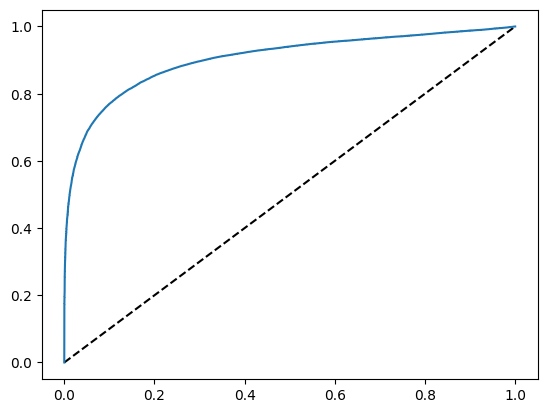

In [58]:
roc = log.predict_proba(x_train)[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_train,roc)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label= "Logistic")
plt.show()

In [59]:
metrics.roc_auc_score(y_train,roc)

0.9036265902937509

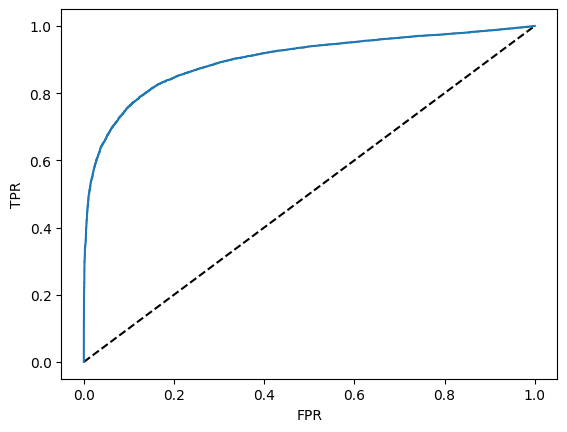

In [60]:
rocc = log.predict_proba(x_test)[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_test,rocc)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label= "Logistic")
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [61]:
metrics.roc_auc_score(y_test,rocc)

0.8998374302530394

# Confusion Matrix

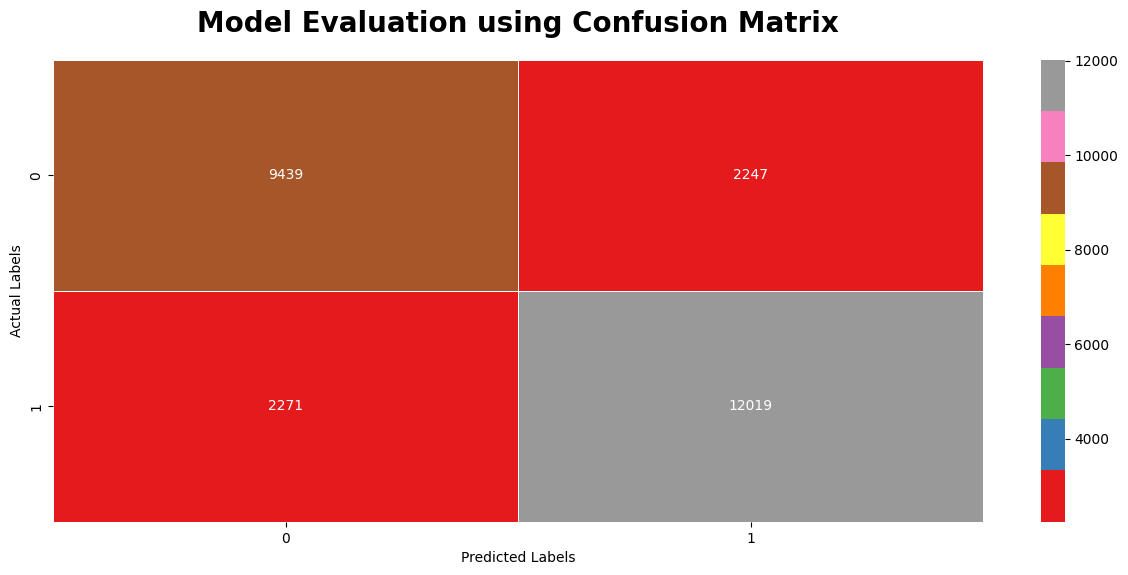

In [62]:
y_test_pred = log.predict(x_test)
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

# GridSearchCV

In [63]:
param_grid = {
    "penalty": ["l1","l2"],
    "C" : [0.1,0.5,1,5,10]
}

In [64]:
grid = GridSearchCV(estimator=log,param_grid=param_grid,cv=5)

In [65]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2']})

In [66]:
best_param = grid.best_params_
best_model = grid.best_estimator_

In [67]:
y_pred =best_model.predict(x_test)

In [68]:
acc= accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
rec= recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [69]:
print("Best Param:",best_param)
print("Accuracy :" , acc)
print("precision:" ,pre)
print("Recall:", rec)
print("F1 Score:" , f1)
print("AUC-ROC:", roc_auc)

Best Param: {'C': 0.5, 'penalty': 'l2'}
Accuracy : 0.8260702186633816
precision: 0.8424926398429833
Recall: 0.8410776766969909
F1 Score: 0.8417845636643786
AUC-ROC: 0.8243981571915555


# GradientBoosting

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model

GradientBoostingClassifier()

0.9179627348321527


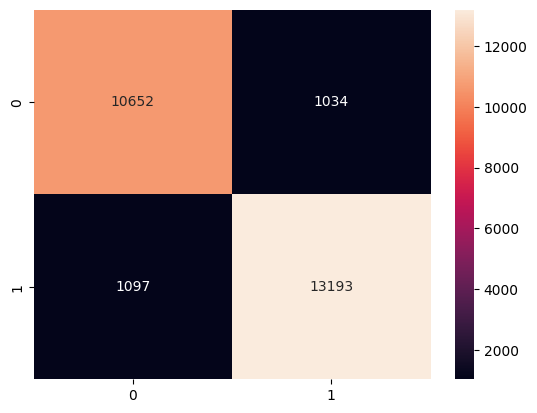

In [71]:
model.fit(x_train, y_train)
pred = model.predict(x_test)

print(accuracy_score(y_test, pred))

conf_maxtrix = confusion_matrix(y_test, pred)
sns.heatmap(conf_maxtrix, annot=True, fmt='d')
plt.show()

# 2) Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=20)

In [ ]:
classifier.fit(x_train,y_train)

In [ ]:
y_predd = classifier.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test,y_predd)
print(f"Accuracy : {accuracy}")

In [ ]:
print('Classification Report:')
print(classification_report(y_test,y_predd))

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
y_test_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(10,6))
sns.heatmap(data=cm, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

# AUC- ROC Curve and AUC- ROC Score

In [ ]:
roc = classifier.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,roc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='logistic')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [ ]:
metrics.roc_auc_score(y_test,roc)

# 3) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_model.fit(x_train, y_train)

In [ ]:
y_pred_rf = rf_model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy:.2f}')

In [ ]:
print('\nClassification Report:')
print(classification_report(y_test, y_pred_rf))

In [ ]:
y_scores = rf_model.predict_proba(x_test)[:, 1]

In [ ]:
from sklearn.metrics import auc
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
feature_importances = rf_model.feature_importances_

In [ ]:
feature_importances

# 4) SVM

In [ ]:
svcm = SVC(kernel= 'linear')  ## linear,rbf,poly,sigmoid, we can applide

In [ ]:
svcm.fit(x_train,y_train)

In [ ]:
y_pred = svcm.predict(x_test)

In [ ]:
acc= accuracy_score(y_test,y_pred)
acc

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(x_train, y_train)
svc_predicted = svc.predict(x_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

# Confusion Matrix

In [ ]:
y_test_pred = svcm.predict(x_test)
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

# AUC- ROC Curve and AUC- ROC Score

In [ ]:
from sklearn import metrics
roc = svcm.decision_function(x_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, roc)
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label="SVM")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
metrics.roc_auc_score(y_train,roc)

In [ ]:
rocc = svcm.decision_function(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, rocc)
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label="SVM")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
metrics.roc_auc_score(y_test,rocc)

In [ ]:
print("Test Score:",metrics.roc_auc_score(y_test,y_pred))

# GridSearchCV

In [ ]:
# defining parameter range 
#param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
               'kernel': ['linear']} 

#grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
#grid.fit(x_train, y_train) 

***System Take lots of Time***

In [ ]:
# print best parameter after tuning 
#print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
#print(grid.best_estimator_) 

In [ ]:
#grid_predictions = grid.predict(x_test) 

# print classification report 
#print(classification_report(y_test, grid_predictions)) 

In [ ]:
classifier = OneVsRestClassifier(SVC(kernel='rbf',probability=True,random_state=0))
y_score = classifier.fit(x_train,y_train).decision_function(x_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
# Plot ROC curvea
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
classifier = OneVsRestClassifier(SVC(kernel='sigmoid',probability=True,random_state=0))
y_score = classifier.fit(x_train,y_train).decision_function(x_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
# Plot ROC curvea
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Operating Characterstic Curve

In [ ]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
dt_false_positive_rate,dt_true_positive_rate,nb_threshold = roc_curve(y_test,y_predd)
                                                            

rf_false_positive_rate,rf_true_positive_rate,knn_threshold = roc_curve(y_test,y_pred_rf)

svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Decision Trees')


plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')

plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# Model Evaluation

In [ ]:
model_E = pd.DataFrame({'Model': ['Logistic Regression','Decision Trees',
                    'Random Forest','Support Vector Machine'], 'Accuracy': [83,
                    93,95,94]})
model_E

In [ ]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy %")
plt.bar(model_E['Model'],model_E['Accuracy'],color = colors)
plt.show()

# Gradio

In [86]:
import gradio as gr

# Replace this with your actual model loading logic
def gb():
    # Example placeholder for model creation
    return log

# Replace this with your actual model
model = gb()

def predict(Customer_Type, Age, Type_of_Travel, Class, Flight_Distance, Seat_comfort, Departure_Arrival_time_convenient, Gate_location, Online_support, Ease_of_Online_booking, On_board_service, Leg_room_service, Baggage_handling, Checkin_service, Cleanliness, Online_boarding):
    # Convert one-hot-encoded gender and bmi to numerical values
    Customer_Type_disloyal_Customer = 1 if Customer == "Loyal" else 0
    Type_of_Travel_Personal_Travel= 1 if Travel == "Business travel" else 0

    Class_Eco = 1 if Class == "eco" else 0
    Class_Eco_Plus = 1 if Class == "eco plus" else 0
    

    # Create input array for the model
    input_data = np.array([[Customer_Type_disloyal_Customer, Type_of_Travel_Personal_Travel, Class_Eco, Class_Eco_Plus, 
                       Flight_Distance, Seat_comfort, Departure_Arrival_time_convenient, Gate_location, Online_support, 
                       Ease_of_Online_booking, On_board_service, Leg_room_service, Baggage_handling, Checkin_service, 
                       Cleanliness, Online_boarding, Age]])

    # Make predictions using your model
    prediction = model.predict(input_data)

    return prediction[0]

# Define the Gradio interface with specified inputs
iface = gr.Interface(
    fn=predict,
    inputs=[
        gr.Number(label="Age"),
        gr.Number(label="type of customer"),
        gr.Slider(label="personal travel", minimum=1, maximum=10, default=7),
        gr.Slider(label="eco class", minimum=1, maximum=5, default=50),
        gr.Slider(label="eco plus", minimum=1, maximum=15, default=5),
        gr.Number(label="Flight Distance"),
        gr.Number(label="comfort"),
        gr.Number(label="Gate location")
    ],
    outputs="text"
)
# Launch the Gradio interface
iface.launch(share=True)

TypeError: Slider.__init__() got an unexpected keyword argument 'default'

In [ ]:
Write a gradio code for above project?

In [72]:
pip install --upgrade typing-extensions

Note: you may need to restart the kernel to use updated packages.


In [94]:
import gradio as gr
import numpy as np

def gb():
    # Example placeholder for model creation
    return log

model = gb()

def predict(Customer_Type, Age, Type_of_Travel, Class, Flight_Distance, Seat_comfort, Departure_Arrival_time_convenient, Gate_location, Online_support, Ease_of_Online_booking, On_board_service, Leg_room_service, Baggage_handling, Checkin_service, Cleanliness, Online_boarding):
    Customer_Type_disloyal_Customer = 1 if Customer_Type == "Disloyal Customer" else 0
    Type_of_Travel_Personal_Travel = 1 if Type_of_Travel == "Personal Travel" else 0

    Class_Eco = 1 if Class == "eco" else 0
    Class_Eco_Plus = 1 if Class == "eco plus" else 0
    
    input_data = np.array([[Customer_Type_disloyal_Customer, Type_of_Travel_Personal_Travel, Class_Eco, Class_Eco_Plus, 
                           Flight_Distance, Seat_comfort, Departure_Arrival_time_convenient, Gate_location, Online_support, Ease_of_Online_booking, On_board_service, Leg_room_service, Baggage_handling, Checkin_service, Cleanliness, Online_boarding, Age]])
    
    prediction = model.predict(input_data)
    
    return prediction[0]

iface = gr.Interface(
    fn=predict,
    inputs=[
        gr.Number(label="Customer Type", choices=["Loyal Customer", "Disloyal Customer"], default="Loyal Customer"),
        gr.inputs.Number(name="Age", label="Age", default=70),
        gr.inputs.Dropdown(label="Type of Travel", choices=["Business travel", "Personal Travel"], default="Business travel"),
        gr.inputs.Dropdown(label="Class", choices=["business", "eco", "eco plus"], default="eco"),
        gr.inputs.Number(name="Flight Distance", label="Flight Distance", default=120),
        gr.inputs.Number(name="Seat comfort", label="Seat comfort", default=5),
        gr.inputs.Number(name="Gate location", label="Gate location", default=70)]
)

TypeError: Number.__init__() got an unexpected keyword argument 'choices'

In [91]:
import gradio as gr
import numpy as np

# Replace this with your actual model loading logic
def gb():
    # Example placeholder for model creation
    return log

# Replace this with your actual model
model = gb()

def predict(Age, Customer_Type, Type_of_Travel, Class, Flight_Distance, Seat_comfort, Departure_Arrival_time_convenient, Gate_location, Online_support, Ease_of_Online_booking, On_board_service, Leg_room_service, Baggage_handling, Checkin_service, Cleanliness, Online_boarding):
    # Convert one-hot-encoded values
    Customer_Type_disloyal_Customer = 1 if Customer_Type == "Loyal" else 0
    Type_of_Travel_P

In [92]:
df

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0
